In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('recovered.csv')
df.head()

,Unnamed: 0,Country,Population,Area,Density,GDP,handwashing_facilities,hospital_beds_per_100k,Airports,Lat,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,0,Afghanistan,38928341.0,652230.0,58.3257,74792.0,37.746,0.50,22.0,33.0000,...,938.0,996.0,1040.0,1075.0,1097.0,1128.0,1138.0,1209.0,1259.0,1303.0
1,1,Albania,2877800.0,28748.0,100.2128,38078.0,NaN,2.89,5.0,41.1533,...,771.0,777.0,783.0,789.0,795.0,803.0,812.0,823.0,851.0,857.0
2,2,Algeria,43851043.0,2381741.0,18.0763,638363.0,83.741,1.90,44.0,28.0339,...,4062.0,4256.0,4426.0,4784.0,4747.0,4918.0,5129.0,5277.0,5422.0,5549.0
3,3,Andorra,77265.0,468.0,164.8333,NaN,NaN,NaN,NaN,42.5063,...,639.0,652.0,653.0,653.0,663.0,676.0,676.0,681.0,684.0,692.0
4,4,Angola,32866268.0,1246700.0,25.5276,199329.0,26.664,NaN,25.0,-11.2027,...,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [4]:
names = df.iloc[:,11:].columns

In [5]:
new_df = pd.DataFrame()

In [6]:
for i in range(df.iloc[:, 11:].shape[1]):
    if i > 0:
        new_df[names[i]] = df[names[i]]/ df[names[i - 1]]
        new_df[names[i]] = np.array(new_df[names[i]].fillna(0) * 1000000).astype('int')

In [7]:
new_df.columns = range(len(new_df.columns))

In [8]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0,0,0,0,0,0,0,0,0,0,...,1008602,1061833,1044176,1033653,1020465,1028258,1008865,1062390,1041356,1034948
1,0,0,0,0,0,0,0,0,0,0,...,1017150,1007782,1007722,1007662,1007604,1010062,1011207,1013546,1034021,1007050
2,0,0,0,0,0,0,0,0,0,0,...,1023689,1047759,1039943,1080885,992265,1036022,1042903,1028855,1027477,1023423
3,0,0,0,0,0,0,0,0,0,0,...,1000000,1020344,1001533,1000000,1015313,1019607,1000000,1007396,1004405,1011695
4,0,0,0,0,0,0,0,0,0,0,...,1000000,1000000,1058823,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [9]:
import statsmodels.tsa.stattools as ts
import datetime
import time

In [10]:
def coint(country_1, country_2):
    # date_index
    date_index = []
        
    data1 = np.array(new_df.iloc[country_1, :-1]).astype('float')
    data2 = np.array(new_df.iloc[country_2, :-1]).astype('float')
    
    coint_result = ts.coint(data1, data2)
    
    return coint_result

In [11]:
data = []
buffer = []
for i in range(len(new_df)):
    data.append(buffer)
    buffer = []
    for j in range(len(new_df)):
        buffer.append([df['Country'][i], df['Country'][j], coint(i, j)[1]])

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

In [12]:
columns = pd.DataFrame(data[1])[1]
rows    = pd.DataFrame(data[1])[1]

In [13]:
coint_table = pd.DataFrame(data[0], columns=columns, index=rows)

In [14]:
for index in range(len(data)):
    for i in data[index]:
        coint_table[i[0]][i[1]] = i[2]

In [15]:
import seaborn as sns

In [26]:
country = np.array(coint_table['Russia'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['Russia'].sort_values(ascending=False)[:10].values)

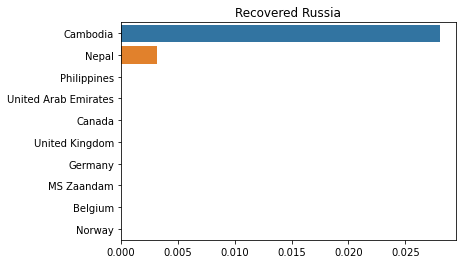

In [27]:
plt.title('Recovered Russia')
ax = sns.barplot(x=coint, y=country)

In [28]:
country = np.array(coint_table['Germany'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['Germany'].sort_values(ascending=False)[:10].values)

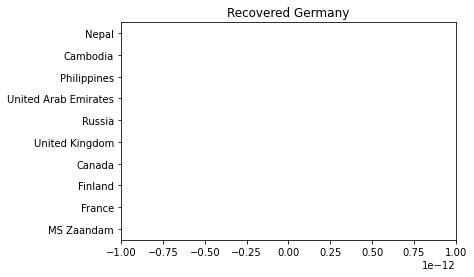

In [29]:
plt.title('Recovered Germany')
ax = sns.barplot(x=coint, y=country)

In [30]:
country = np.array(coint_table['China'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['China'].sort_values(ascending=False)[:10].values)

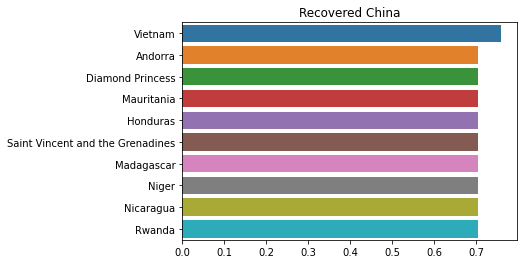

In [31]:
plt.title('Recovered China')
ax = sns.barplot(x=coint, y=country)